In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd

In [14]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [17]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [18]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

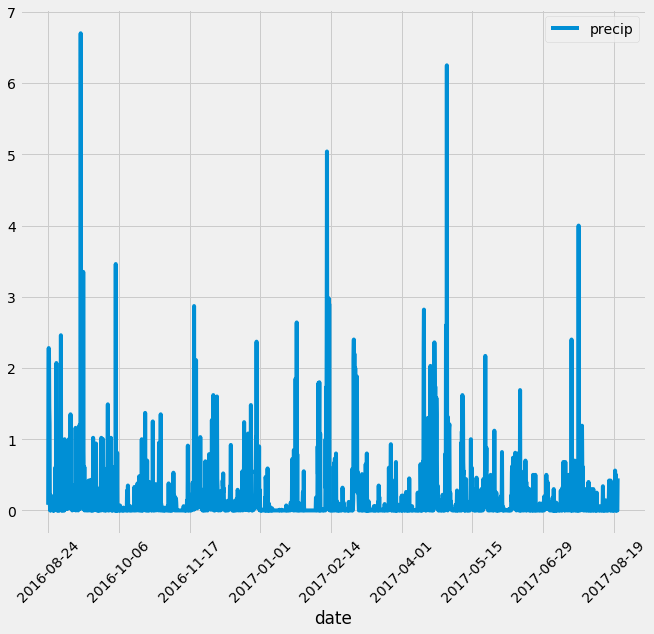

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database

last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]

previous_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

results = session.query(measurement.date, measurement.prcp).filter(measurement.date > previous_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

ResultsDF = pd.DataFrame(results,columns = ['date', 'precip'])

# Sort the dataframe by date

ResultsDF = ResultsDF.sort_values("date").dropna().set_index("date")


# Use Pandas Plotting with Matplotlib to plot the data

ResultsDF.plot(figsize = (10,9), rot = (45))

#TO DO - rotate labels, change fig size



In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data

ResultsDF.describe()

,precip
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# Design a query to show how many stations are available in this dataset?

stations = session.query(station.station).all()

StationsDF = pd.DataFrame(stations,columns = ['stations',])

unique_stations = StationsDF["stations"].unique()

len(unique_stations)

9

In [54]:
# What are the most active stations? (i.e. what stations have the most rows)?

all_stations = session.query(measurement.station, measurement.prcp).all()

StationsDF = pd.DataFrame(all_stations,columns = ['stations', 'prcp',])

Stations_grouped = StationsDF.groupby("stations")

measurement_count_per_station = Stations_grouped["prcp"].count()

# List the stations and the counts in descending order.

Station_summary_df = pd.DataFrame({"Number of Measurements": measurement_count_per_station,})

Station_summary_df = Station_summary_df.sort_values("Number of Measurements", ascending=False).dropna()

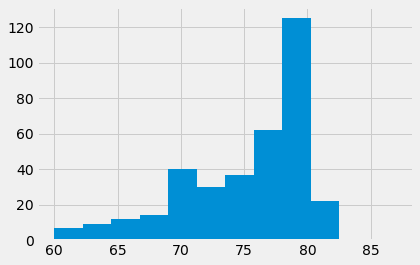

In [53]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

all_stations = session.query(measurement.station, measurement.tobs).all()

StationsDF = pd.DataFrame(all_stations,columns = ['stations', 'tobs',])


sel = [measurement.station, 
       func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs),
       func.count(measurement.tobs),]


summary = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.tobs)).all()

most_active = session.query(*sel).order_by(func.count(measurement.tobs).desc()).first()[0]


# Choose the station with the highest number of temperature observations.


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


most_active_results = session.query(measurement.date, measurement.station, measurement.tobs).filter(measurement.date > previous_date).filter(measurement.station == most_active).order_by(measurement.tobs.desc()).all()


MAResultsDF = pd.DataFrame(most_active_results,columns = ['date', 'station', 'tobs'])


plot = MAResultsDF['tobs'].hist(bins=12)




## Bonus Challenge Assignment

In [106]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
